# Author: Chachra Aastha

# Purpose: Assignment 2

# Class: ALY 6015 - Regression and Hypothesis

#Import necessary packages

In [0]:
import numpy as np
import pandas as pd
import os
import io
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
from pylab import rcParams
from google.colab import files
rcParams['figure.figsize'] = (23, 8)
sns.set_style('whitegrid')
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load data

In [0]:
data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTZAVzBrW4zfKILTJ36D7N4HrQz2PDIslS_K4v3c38IMG0JbiFmjjzP8JAi4qc5SQOP5yI-67O8m2eJ/pub?gid=1256322443&single=true&output=csv"
aus_df = pd.read_csv(data_path)
#df.set_index('id')

#Acquire Data and perform modifications

In [129]:
aus_df.shape

(3974, 11)

In [130]:
aus_df.head()

,id,country,state,neighbourhood_cleansed,property_type,square_meters,price,room_type,bathrooms,bedrooms,beds
0,3363954,Australia,NSW,BALLINA SHIRE COUNCIL,House,0.00,"$2,900.00",Entire home/apt,3.0,4.0,4.0
1,13048065,Australia,NSW,BALLINA SHIRE COUNCIL,House,1.55,$28.00,Private room,1.0,1.0,1.0
2,1451202,Australia,NSW,BALLINA SHIRE COUNCIL,Guest suite,15.00,$141.00,Entire home/apt,1.0,1.0,1.0
3,2345959,Australia,NSW,BALLINA SHIRE COUNCIL,House,17.28,$50.00,Private room,4.0,4.0,3.0
4,26087141,Australia,NSW,BALLINA SHIRE COUNCIL,House,17.64,$52.00,Private room,1.0,1.0,1.0


#column list:
*   neighbourhood_cleansed - A modified version of the neighborhood that can be used for grouping--Only Long Beach is included

*   property_type - The type of property that is being listed (e.g., a castle)---Only apartments are included.

*   room_type - The type of room that is available for rent (e.g., a shared room)---Only "Entire home/apt" is included.

*   bathrooms - The count of bathrooms available (e.g., 1, 2, 1.5).

*   bedrooms - The count of bedrooms available (e.g., 0, 1, 2).
*   beds - The count of beds available in the rental (e.g., 0, 1, 2).


*  price - The cost of the rental per night in USD.


*   square_meters - property type area in square meters




#EDA and Data Cleaning

In [0]:
#a) Drop extraneous columns
try:
    aus_df = aus_df.drop(columns = ['id', 'country', 'state'])
except KeyError:
  print ("Note: Either the columns were not found or already dropped.")


In [0]:
#b) Remove $ and , from price
aus_df["price"] = aus_df["price"].str.replace(",","")
aus_df["price"] = aus_df["price"].str.replace("$","")
aus_df["price"] = aus_df["price"].astype(float)

In [133]:
#checking if the , and $ were removed
aus_df.head()

,neighbourhood_cleansed,property_type,square_meters,price,room_type,bathrooms,bedrooms,beds
0,BALLINA SHIRE COUNCIL,House,0.00,2900.0,Entire home/apt,3.0,4.0,4.0
1,BALLINA SHIRE COUNCIL,House,1.55,28.0,Private room,1.0,1.0,1.0
2,BALLINA SHIRE COUNCIL,Guest suite,15.00,141.0,Entire home/apt,1.0,1.0,1.0
3,BALLINA SHIRE COUNCIL,House,17.28,50.0,Private room,4.0,4.0,3.0
4,BALLINA SHIRE COUNCIL,House,17.64,52.0,Private room,1.0,1.0,1.0


In [134]:
#check the datatypes
aus_df.dtypes

neighbourhood_cleansed     object
property_type              object
square_meters             float64
price                     float64
room_type                  object
bathrooms                 float64
bedrooms                  float64
beds                      float64
dtype: object

In [135]:
#c) check for nulls 
aus_df.isnull().sum()

neighbourhood_cleansed    0
property_type             0
square_meters             0
price                     0
room_type                 0
bathrooms                 5
bedrooms                  2
beds                      1
dtype: int64

We have null values in columns bathrooms, bedrooms and beds, let us remove those

In [136]:
# drop all rows with any NaN and NaT values
aust_df = aus_df.dropna()
print(aust_df)

     neighbourhood_cleansed property_type  ...  bedrooms  beds
0     BALLINA SHIRE COUNCIL         House  ...       4.0   4.0
1     BALLINA SHIRE COUNCIL         House  ...       1.0   1.0
2     BALLINA SHIRE COUNCIL   Guest suite  ...       1.0   1.0
3     BALLINA SHIRE COUNCIL         House  ...       4.0   3.0
4     BALLINA SHIRE COUNCIL         House  ...       1.0   1.0
...                     ...           ...  ...       ...   ...
3969    TWEED SHIRE COUNCIL         House  ...       6.0   6.0
3970    TWEED SHIRE COUNCIL     Apartment  ...       3.0   3.0
3971    TWEED SHIRE COUNCIL         House  ...       4.0   5.0
3972    TWEED SHIRE COUNCIL         House  ...       6.0   7.0
3973    TWEED SHIRE COUNCIL         House  ...       3.0   3.0

[3966 rows x 8 columns]


In [137]:
#cross-verify if now we have nulls
aust_df.isnull().sum()

neighbourhood_cleansed    0
property_type             0
square_meters             0
price                     0
room_type                 0
bathrooms                 0
bedrooms                  0
beds                      0
dtype: int64

In [138]:
#Convert Catogorical Data in Numeric Data
for co in aust_df.select_dtypes(include=['object']):
  print(aust_df[co].describe())

count                    3966
unique                      5
top       BYRON SHIRE COUNCIL
freq                     2489
Name: neighbourhood_cleansed, dtype: object
count      3966
unique        8
top       House
freq       2419
Name: property_type, dtype: object
count                3966
unique                  3
top       Entire home/apt
freq                 3218
Name: room_type, dtype: object


In [139]:
dc=aust_df.corr()
dc

,square_meters,price,bathrooms,bedrooms,beds
square_meters,1.000000,0.210591,0.287491,0.323078,0.306173
price,0.210591,1.000000,0.560860,0.574895,0.504577
bathrooms,0.287491,0.560860,1.000000,0.754708,0.644070
bedrooms,0.323078,0.574895,0.754708,1.000000,0.832392
beds,0.306173,0.504577,0.644070,0.832392,1.000000


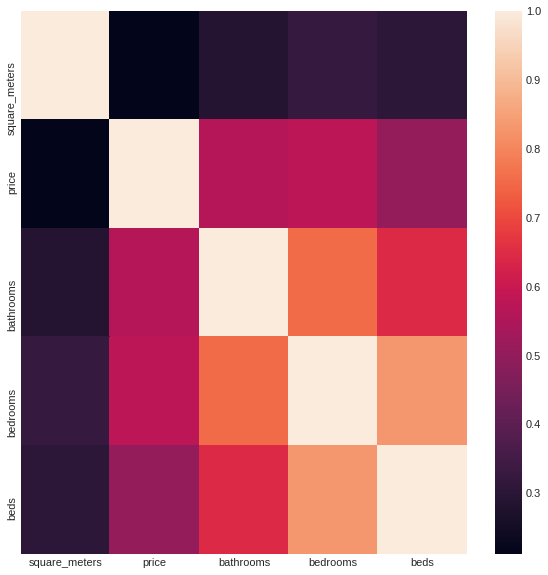

In [140]:
plt.figure(figsize=(10,10))
sns.heatmap(aust_df.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72bbb06a90>,
      dtype=object)

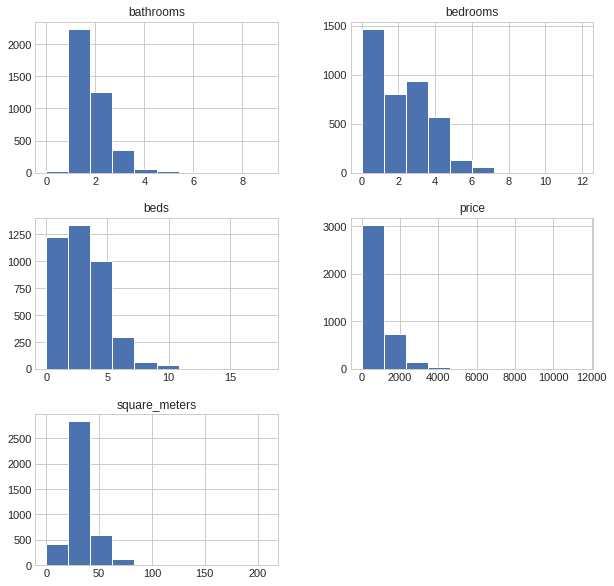

In [141]:
aust_df.hist(figsize=(10,10))

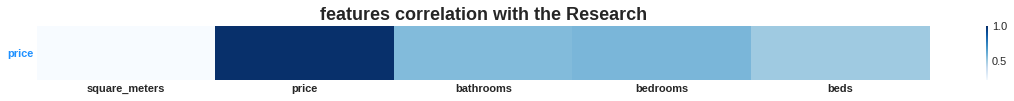

In [142]:
corr = aust_df.corr()
f,ax=plt.subplots(figsize=(20,1))
sns.heatmap(corr.sort_values(by=['price'],ascending=False).head(1), cmap='Blues')
plt.title("features correlation with the Research", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)
plt.show()

In [143]:
#Trim outliers:
start_percentile = aust_df['price'].quantile(.01)
end_percentile = aust_df['price'].quantile(.99)
aust_price_outliers_df = aust_df.loc[((aust_df['price'] <= start_percentile) | (aust_df['price'] >= end_percentile))]
aust_df_trim = aust_df.loc[((aust_df['price'] > start_percentile) & (aust_df['price'] < end_percentile))]

#Perform additional conversions to 
aust_df_trim_clean = aust_df_trim.copy()

#Perform final filters to focus on specific areas
aust_df_filtered = aust_df_trim.loc[(aust_df_trim['neighbourhood_cleansed'].isin(['BYRON SHIRE COUNCIL']))]
aust_df_filtered = aust_df_filtered.loc[(aust_df_filtered['property_type'].isin(['Apartment']))]
aust_df_filtered = aust_df_filtered.loc[(aust_df_filtered['room_type'] == 'Entire home/apt')]

#Drop incomplete cases 
aust_df_filtered = aust_df_filtered.dropna()

aust_df_filtered.head(1)




,neighbourhood_cleansed,property_type,square_meters,price,room_type,bathrooms,bedrooms,beds
540,BYRON SHIRE COUNCIL,Apartment,19.16,99.0,Entire home/apt,0.5,0.0,1.0


#Describe quantitative variables

In [144]:
aust_df_filtered.describe()

,square_meters,price,bathrooms,bedrooms,beds
count,445.000000,445.000000,445.000000,445.000000,445.000000
mean,27.364764,734.813483,1.398876,1.761798,2.442697
std,3.583210,563.261132,0.554363,1.000845,1.457961
min,18.220000,79.000000,0.500000,0.000000,0.000000
25%,24.700000,296.000000,1.000000,1.000000,1.000000
50%,27.600000,637.000000,1.000000,2.000000,2.000000
75%,30.110000,1000.000000,2.000000,2.000000,3.000000
max,35.430000,3700.000000,4.000000,10.000000,14.000000


#Describe qualitative variables

In [145]:
aust_df[['neighbourhood_cleansed','property_type', 'room_type']].describe()

,neighbourhood_cleansed,property_type,room_type
count,3966,3966,3966
unique,5,8,3
top,BYRON SHIRE COUNCIL,House,Entire home/apt
freq,2489,2419,3218


#Regression Analysis

In [0]:
#Since square meters is correlated with price (as seen above in heat map)

(10.0, 5200.0)

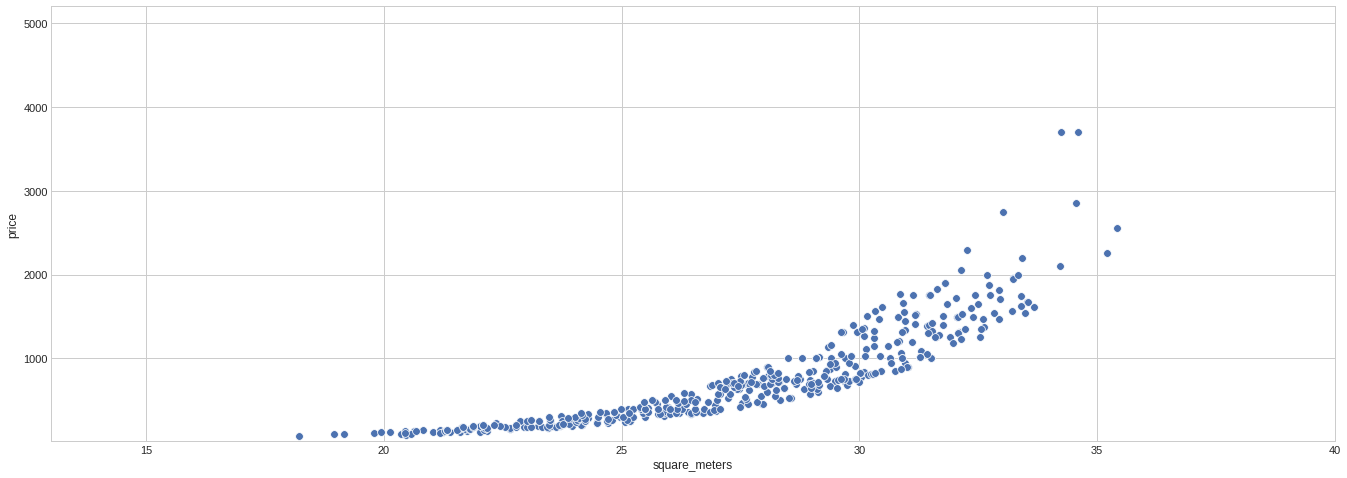

In [147]:
ax = sns.scatterplot(x = 'square_meters', y = 'price', data = aust_df_filtered, s=60)
plt.xlim([13,40])
plt.ylim([10,5200])

(10.0, 5200.0)

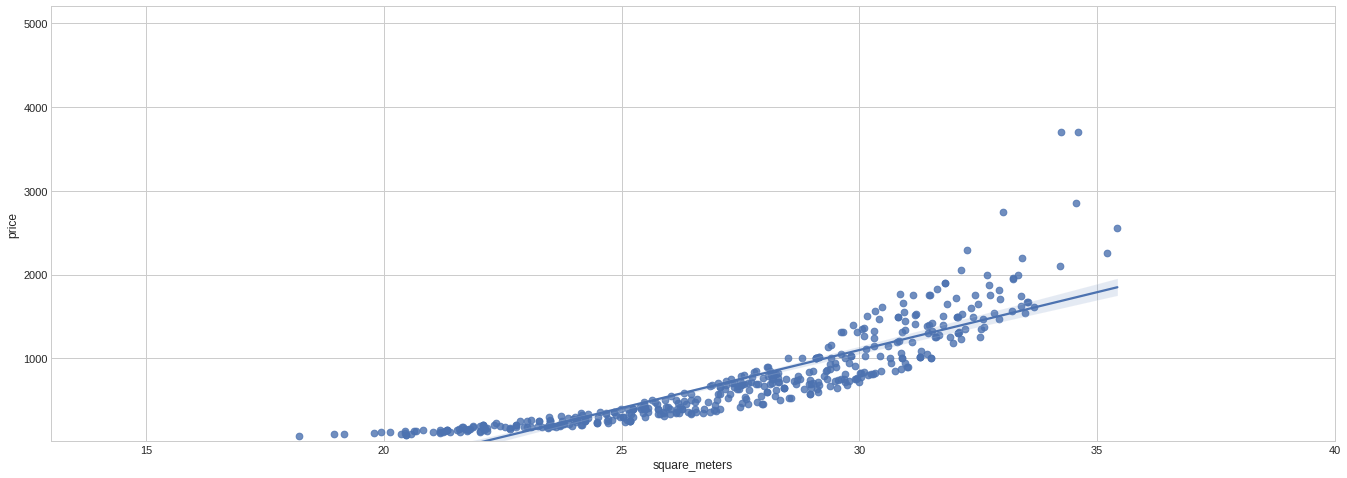

In [148]:
#ax = sns.regplot(x = 'synthetic_sqft', y = 'total_price', data = airbnb_df_filtered)
ax = sns.regplot(x = 'square_meters', y = 'price', data = aust_df_filtered, scatter_kws={'s':45})
plt.xlim([13,40])
plt.ylim([10,5200])

#Sci-Kit Learn

In [0]:
X_cols = ['square_meters']

#Load the X data set
X = aust_df_filtered[X_cols].values

#Initialize the data and column length variables
data_length = len(aust_df_filtered)
column_length = len(aust_df_filtered[X_cols].columns)

#Reshape and load remaining data sets
X = X.reshape(data_length,column_length)
y = aust_df_filtered['price'].values
y = y.reshape(data_length,1)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y)

#Create the linear regression object and train/fit models
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

#Make predictions using the testing set
listing_y_pred = lin_reg.predict(X_test)

#Take the results from above and print out a few pieces of information

In [150]:
#Print a few predictions
print((pd.DataFrame(listing_y_pred, columns={'y_prediction'}).head(5)))
print()

#Print the intercept
print('Intercept:', float(lin_reg.intercept_))

#Print the coefficient(s)
coeff_df = pd.DataFrame(lin_reg.coef_)
coeff_df.columns = X_cols
print(coeff_df)
print()

#Performance Metric: Mean Squared Error
print("Mean Squared Error (MSE):%.2f" % mean_squared_error(y_test, listing_y_pred))

# Explained variance score:
print('Variance Score (R^2):%.2f' % r2_score(y_test, listing_y_pred))

   y_prediction
0   1461.838175
1   1202.620153
2   1131.544244
3    905.773709
4     -5.670304

Intercept: -3084.2327263777734
   square_meters
0     139.364528

Mean Squared Error (MSE):54058.10
Variance Score (R^2):0.82


#Re-plot the graph using the results from Scikit-Learn

(10.0, 5200.0)

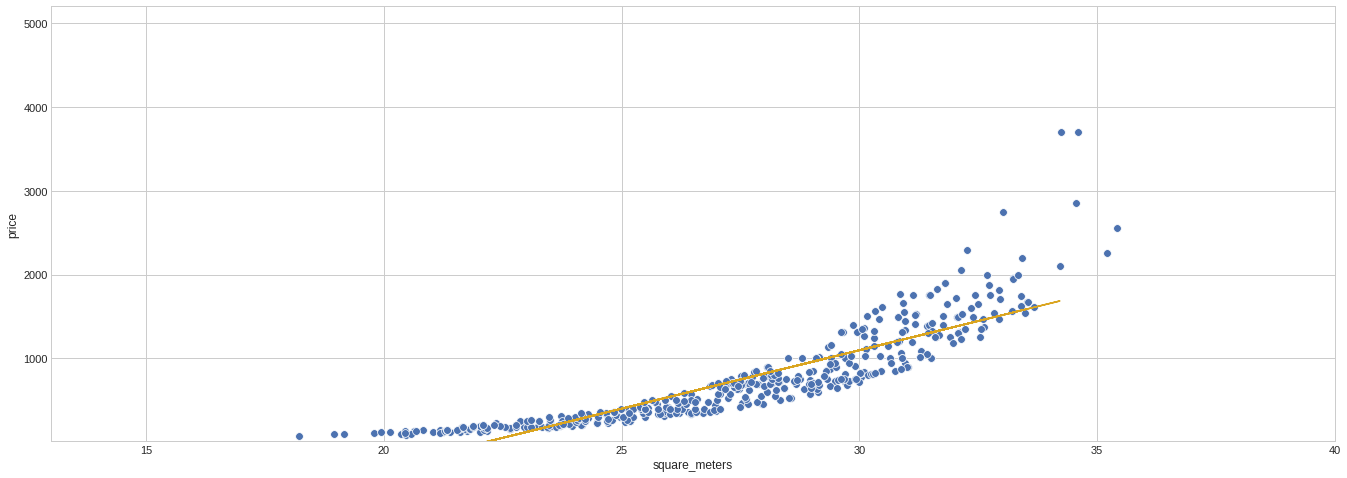

In [151]:
ax = sns.scatterplot(x = 'square_meters', y = 'price', data = aust_df_filtered, s=60)
plt.plot(X_test, listing_y_pred, color='goldenrod')
plt.xlim([13,40])
plt.ylim([10,5200])

#Let's repeat the previous analysis, but with a few more variables.

In [0]:
X_cols2 = ['square_meters', 'bathrooms', 'beds']

#Load the X data set
X2 = aust_df_filtered[X_cols2].values

#Initialize the data and column length variables
data_length2 = len(aust_df_filtered)
column_length2 = len(aust_df_filtered[X_cols2].columns)

#Reshape and load remaining data sets
X2 = X2.reshape(data_length2,column_length2)
y2 = aust_df_filtered['price'].values
y2 = y2.reshape(data_length2,1)

#Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2)

#Create the linear regression object and train/fit models
lin_reg2= LinearRegression()
lin_reg2.fit(X_train2, y_train2)

#Make predictions using the testing set
listing_y_pred2 = lin_reg2.predict(X_test2)

#Take the results from above and print out a few pieces of information







In [153]:
#Print a few predictions
print((pd.DataFrame(listing_y_pred2, columns={'y_prediction'}).head(5)))
print()

#Print the intercept
print('Intercept:', float(lin_reg2.intercept_))

#Print the coefficient(s)
coeff_df2 = pd.DataFrame(lin_reg2.coef_)
coeff_df2.columns = X_cols2
print(coeff_df2)
print()

#Performance Metric: Mean Squared Error
print("Mean Squared Error (MSE):%.2f" % mean_squared_error(y_test2, listing_y_pred2))

# Explained variance score:
print('Variance Score (R^2):%.2f' % r2_score(y_test2, listing_y_pred2))

   y_prediction
0    500.782352
1    -75.877649
2    723.371050
3    780.616870
4    -41.669005

Intercept: -2834.6796042899214
   square_meters  bathrooms       beds
0     122.173729   66.03629  53.813119

Mean Squared Error (MSE):92877.89
Variance Score (R^2):0.73


#New Filters

In [0]:
#changing filter conditions01

aust_df_filtered1 = aust_df_trim.loc[(aust_df_trim['neighbourhood_cleansed'].isin(['LISMORE CITY COUNCIL']))]
aust_df_filtered1 = aust_df_filtered1.loc[(aust_df_filtered1['property_type'].isin(['Apartment']))]
aust_df_filtered1 = aust_df_filtered1.loc[(aust_df_filtered1['room_type'] == 'Entire home/apt')]

#Drop incomplete cases 
aust_df_filtered1 = aust_df_filtered.dropna()


In [0]:
X1_cols = ['square_meters']

#Load the X data set
X1 = aust_df_filtered1[X1_cols].values

#Initialize the data and column length variables
data_length1 = len(aust_df_filtered1)
column_length1 = len(aust_df_filtered1[X1_cols].columns)

#Reshape and load remaining data sets
X1 = X1.reshape(data_length1,column_length1)
y1 = aust_df_filtered1['price'].values
y1 = y1.reshape(data_length1,1)

#Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1)

#Create the linear regression object and train/fit models
lin_reg1 = LinearRegression()
lin_reg.fit(X1_train, y1_train)

#Make predictions using the testing set
listing_y1_pred = lin_reg.predict(X1_test)


In [199]:
#Print a few predictions
print((pd.DataFrame(listing_y1_pred, columns={'y_prediction'}).head(5)))
print()

#Print the intercept
print('Intercept:', float(lin_reg.intercept_))

#Print the coefficient(s)
coeff_df1 = pd.DataFrame(lin_reg.coef_)
coeff_df1.columns = X1_cols
print(coeff_df1)
print()

#Performance Metric: Mean Squared Error
print("Mean Squared Error (MSE):%.2f" % mean_squared_error(y1_test, listing_y1_pred))

# Explained variance score:
print('Variance Score (R^2):%.2f' % r2_score(y1_test, listing_y1_pred))

   y_prediction
0   1050.634483
1    550.167242
2    889.467066
3    848.468337
4   1339.039333

Intercept: -3126.9945999649035
   square_meters
0     141.374927

Mean Squared Error (MSE):45013.15
Variance Score (R^2):0.82


(10.0, 5000.0)

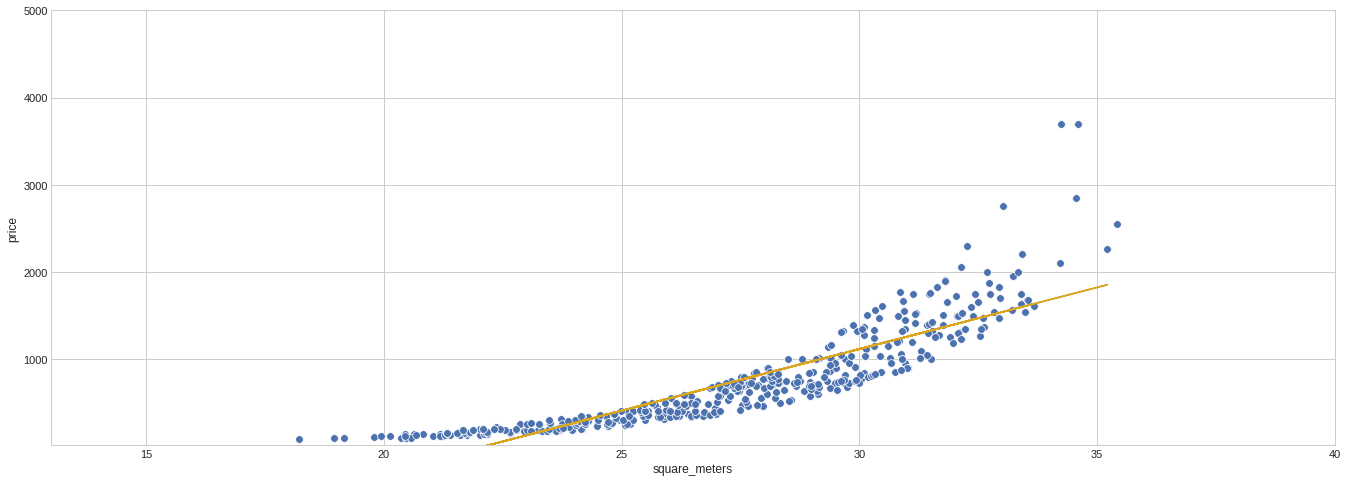

In [200]:
ax = sns.scatterplot(x = 'square_meters', y = 'price', data = aust_df_filtered1, s=60)
plt.plot(X1_test, listing_y1_pred, color='goldenrod')
plt.xlim([13,40])
plt.ylim([10,5000])

In [0]:
#changing filter conditions02

aust_df_filtered2 = aust_df_trim.loc[(aust_df_trim['neighbourhood_cleansed'].isin(['BALLINA SHIRE COUNCIL']))]
aust_df_filtered2 = aust_df_filtered2.loc[(aust_df_filtered2['property_type'].isin(['Apartment']))]
aust_df_filtered2 = aust_df_filtered2.loc[(aust_df_filtered2['room_type'] == 'Entire home/apt')]
aust_df_filtered2 = aust_df_filtered2.loc[(aust_df_filtered2['bathrooms'] == 1)]


#Drop incomplete cases 
aust_df_filtered2 = aust_df_filtered.dropna()

In [0]:
X_cols = ['square_meters']

#Load the X data set
X = aust_df_filtered2[X_cols].values

#Initialize the data and column length variables
data_length = len(aust_df_filtered2)
column_length = len(aust_df_filtered2[X_cols].columns)

#Reshape and load remaining data sets
X= X.reshape(data_length,column_length)
y = aust_df_filtered2['price'].values
y = y.reshape(data_length,1)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y)

#Create the linear regression object and train/fit models
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

#Make predictions using the testing set
listing_y_pred = lin_reg.predict(X_test)

In [187]:
#Print a few predictions
print((pd.DataFrame(listing_y_pred, columns={'y_prediction'}).head(5)))
print()

#Print the intercept
print('Intercept:', float(lin_reg.intercept_))

#Print the coefficient(s)
coeff_df = pd.DataFrame(lin_reg.coef_)
coeff_df.columns = X_cols
print(coeff_df)
print()

#Performance Metric: Mean Squared Error
print("Mean Squared Error (MSE):%.2f" % mean_squared_error(y_test, listing_y_pred))

# Explained variance score:
print('Variance Score (R^2):%.2f' % r2_score(y_test, listing_y_pred))

   y_prediction
0    387.401505
1    -54.096897
2    840.148274
3    249.609010
4   1508.020060

Intercept: -3122.0889746951552
   square_meters
0     140.604587

Mean Squared Error (MSE):57853.45
Variance Score (R^2):0.80


(10.0, 5000.0)

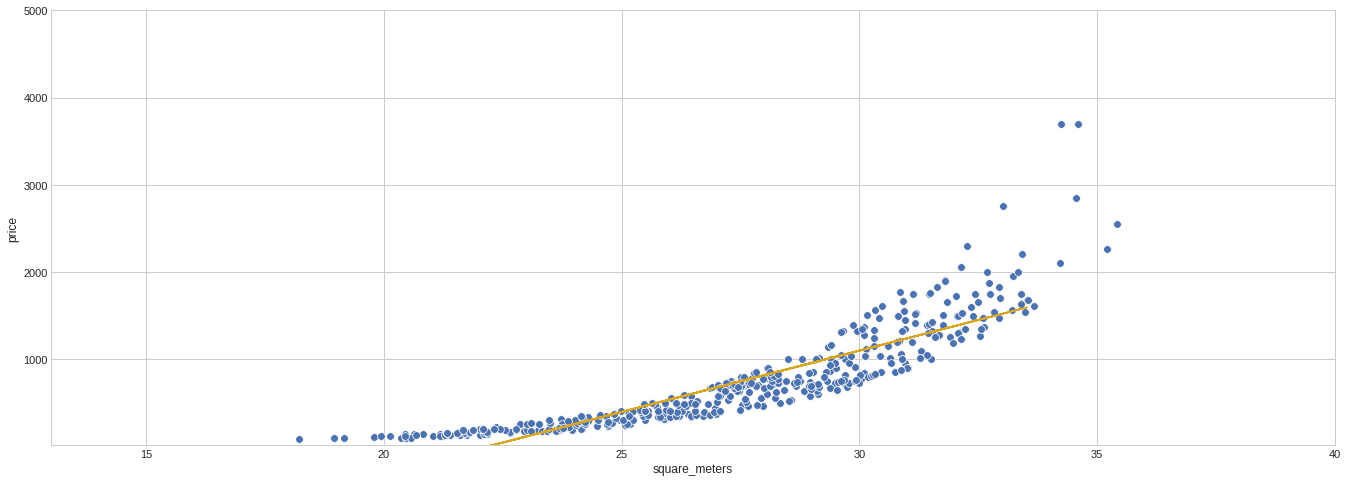

In [189]:
ax = sns.scatterplot(x = 'square_meters', y = 'price', data = aust_df_filtered2, s=60)
plt.plot(X_test, listing_y_pred, color='goldenrod')
plt.xlim([13,40])
plt.ylim([10,5000])

#INFERENCES

- Dependent variable is price that should vary as per independent variables square meters, number of bedrooms, neighboorhood and other columns
- In order to predict the prices in Australia for 5 neighborhood, I considered plotting square feet against price and calculated the Mean squared error and variance for the same
- I observed that the variance is close to one for almost all neighborhoods which tells us square meters is a good fit with price.
- I also calculated the price along other variables such as bathrooms and number of beds as every house price and tried to see if it affects the prediction of house prices and got a variance of .73 which is also a good fit

select an area that you are most and least comfortable providing pricing recommendations and defend your assertions / claims with data

- Most comfortable with Ballina council data as it is east to predict as the sample size is big, number of bedroooms and bathrooms when >1 it affects the prices example ID:7351253
- Least predictable data is with Lismore council as very records are present as well as no predictions can be made as the max and min price is not correlated with either of the features 

#HYPOTHESIS TESTING

In [0]:
#Read data from Google Sheet
LAX_data_pata = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRpjsXU847aQ6TP9fVrB14KsEj6f2_ojj4RLZGAK9oSWtujRj9ScNxUYa2uU8iZje_XdBCmuCYE8TjC/pub?gid=475552683&single=true&output=csv"
SFO_data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRh4__t_DhedzUEf_0GfbINY8hlMu7PcKzcWgaYWRd8ifg0z9liXIfeXwqNJGHUEVWOgv20I97xWmyK/pub?gid=669880&single=true&output=csv"

LAX_df = pd.read_csv(LAX_data_pata)
SFO_df = pd.read_csv(SFO_data_path)

In [0]:
LAX_df.tail()

#Column Definitions:
1. Date - The date that the observation was recorded.
2. LAX/SFO - Avg. Daily Miles Driven Per Hour - The amount of miles driven on average per hour in Los Angeles and San Francisco
3. Marketing Campaign - A binary field that is set to either 1 if either marketing campaign was successful in raising the average miles driven per Uber driver and 0 if it was unsuccessful


In [0]:
list(LAX_df)

#Test Setup:
- The Null Hypothesis is that the average number of miles driven per hour when the marketing campaign was successful is the same as the number of miles driven per hour when the marketing campaign was not successful.

- The Alternate Hypothesis is that the average number of miles driven per hour when the marketing campaign was successful is greater than to the number of miles driven per hour when the marketing campaign was not successful/applied

- The p-value will be set to .05

# # LAX Quantitative variable overiew

In [0]:
LAX_df.describe()

In [0]:
#clean data : removing negative values from Avg miles driven per hour column
LAX_df_clean = LAX_df[(LAX_df['LAX - Avg. Daily Miles Driven Per Hour']>0)]


In [0]:
sns.set_style('whitegrid')
plt.figure(figsize=(23,8))
sns.set(style='whitegrid')
ax = sns.distplot(LAX_df_clean['LAX - Avg. Daily Miles Driven Per Hour'], bins = 8)

In [0]:
data0 = LAX_df_clean['LAX - Avg. Daily Miles Driven Per Hour'].loc[LAX_df['Marketing_Campaign']==0]
data1 = LAX_df_clean['LAX - Avg. Daily Miles Driven Per Hour'].loc[LAX_df['Marketing_Campaign']==1]

sns.set_style('whitegrid')
plt.figure(figsize=(23,8))
sns.set(style='whitegrid')
ax = sns.distplot(data0, hist=True)
ax = sns.distplot(data1, hist=True)
plt.legend(['Unsuccessful Marketing Campaign','Successful Marketing Campaign'])

In [0]:
data0

In [0]:
# Analysis of Variance test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import f_oneway

#generate three independent samples
data0 = LAX_df_clean['LAX - Avg. Daily Miles Driven Per Hour'].loc[LAX_df['Marketing_Campaign']==0]
data1 = LAX_df_clean['LAX - Avg. Daily Miles Driven Per Hour'].loc[LAX_df['Marketing_Campaign']==1]

#compare samples
stat, p = f_oneway(data0, data1)
print('Statistics=%.3f, p=%.3f' % (stat, p))

#interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

# SFO Quantitative variable overiew

In [0]:
SFO_df.tail()

In [0]:
SFO_df.describe()

In [0]:
list(SFO_df)

In [0]:
sns.set_style('whitegrid')
plt.figure(figsize=(23,8))
sns.set(style='whitegrid')
ax = sns.distplot(SFO_df['SFO - Avg. Daily Miles Driven Per Hour'], bins = 8)

In [0]:
data0 = SFO_df['SFO - Avg. Daily Miles Driven Per Hour'].loc[SFO_df['Marketing_Campaign']==0]
data1 = SFO_df['SFO - Avg. Daily Miles Driven Per Hour'].loc[SFO_df['Marketing_Campaign']==1]

sns.set_style('whitegrid')
plt.figure(figsize=(23,8))
sns.set(style='whitegrid')
ax = sns.distplot(data0, hist=True)
ax = sns.distplot(data1, hist=True)
plt.legend(['Unsuccessful Marketing Campaign','Successful Marketing Campaign'])

In [0]:
data0

In [0]:
# Analysis of Variance test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import f_oneway

#generate three independent samples
data0 = SFO_df['SFO - Avg. Daily Miles Driven Per Hour'].loc[SFO_df['Marketing_Campaign']==0]
data1 = SFO_df['SFO - Avg. Daily Miles Driven Per Hour'].loc[SFO_df['Marketing_Campaign']==1]

#compare samples
stat, p = f_oneway(data0, data1)
print('Statistics=%.3f, p=%.3f' % (stat, p))

#interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

In [0]:
#another approach LAX

from scipy.stats import ttest_ind
	
data0 = LAX_df_clean['LAX - Avg. Daily Miles Driven Per Hour'].loc[LAX_df['Marketing_Campaign']==0]
data1 = LAX_df_clean['LAX - Avg. Daily Miles Driven Per Hour'].loc[LAX_df['Marketing_Campaign']==1]
LAX_data0=int(np.mean(data0))
LAX_data1=int(np.mean(data1))
print('LAX - Avg. Daily Miles Driven Per Hour',LAX_data0 )
print('LAX - Avg. Daily Miles Driven Per Hour',LAX_data1 )
tscore, pval=ttest_ind(data0, data1)
print('t-score:', round(tscore,3))
print('p value:', round(pval,3))
	#[Output]:
	# Average miles driven by uber drives when the marketing campaign was not successful: 108 hours
	# Average miles driven by uber drives when the marketing campaign was successful: 183 hours
	# t-score: -6.056
	# p value: 0.0

In [0]:
#another approach SFO

data0 = SFO_df['SFO - Avg. Daily Miles Driven Per Hour'].loc[SFO_df['Marketing_Campaign']==0]
data1 = SFO_df['SFO - Avg. Daily Miles Driven Per Hour'].loc[SFO_df['Marketing_Campaign']==1]
SFO_data0=int(np.mean(data0))
SFO_data1=int(np.mean(data1))
print('SFO - Avg. Daily Miles Driven Per Hour',SFO_data0 )
print('SFO - Avg. Daily Miles Driven Per Hour',SFO_data1 )
tscore, pval=ttest_ind(data0, data1)
print('t-score:', round(tscore,3))
print('p value:', round(pval,3))
	#[Output]:
	# Average miles driven by uber drives when the marketing campaign was not successful: 71 hours
	# Average miles driven by uber drives when the marketing campaign was successful: 30 hours
	# t-score: 7.037
	# p value: 0.0


#CONCLUSION

1. We can reject the null hypothesis and accept the claim that the marketing campaign was successful in raising the average miles driven per Uber driver in Los Angeles from 108 to 183 hours

2. We can reject the null hypothesis and accept the claim that the marketing campaign was successful in raising the average miles driven per Uber driver in Los Angeles from 108 to 183 hours

#FACTORS THAT MIGHT AFFECT THE VALIDITY OF THIS STUDY ARE:

- Sample size (n). Other things being equal, the greater the sample size, the greater the power of the test
- Significance level (α). The lower the significance level, the lower the power of the test. If you reduce the significance level (e.g., from 0.05 to 0.01), the region of acceptance gets bigger. As a result, you are less likely to reject the null hypothesis. This means you are less likely to reject the null hypothesis when it is false, so you are more likely to make a Type II error. In short, the power of the test is reduced when you reduce the significance level; and vice versa.
- The "true" value of the parameter being tested. In our case number of miles driven per hour by an uber driver before and after marketing campaign. The greater the difference between the "true" value of a parameter and the value specified in the null hypothesis, the greater the power of the test. That is, the greater the effect size, the greater the power of the test.
